In [2]:
import pandas
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster", font_scale=0.75)
sns.set_palette("colorblind")


## Kernel Allocator

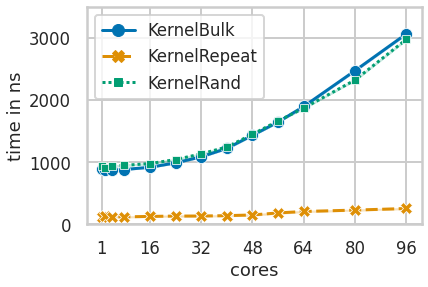

In [3]:
r0 = pandas.read_csv("keep/remote/kernel_bulk.csv")
r0["alloc"] = "KernelBulk"
r1 = pandas.read_csv("keep/remote/kernel_repeat.csv")
r1["alloc"] = "KernelRepeat"
r2 = pandas.read_csv("keep/remote/kernel_rand.csv")
r2["alloc"] = "KernelRand"
pgd = pandas.concat([r0, r1, r2], ignore_index=True)
pgd["cores"] = pgd["x"]
# pgd = pgd.groupby(["x", "alloc"]).min()
g = sns.lineplot(data=pgd, x="cores", y="get_avg",
                 style="alloc", hue="alloc", markers=True)
g.set(xticks=[1, 16, 32, 48, 64, 80, 96])
g.set(ylim=(0, 3500))
g.set(ylabel="time in ns")
g.legend()


# Other

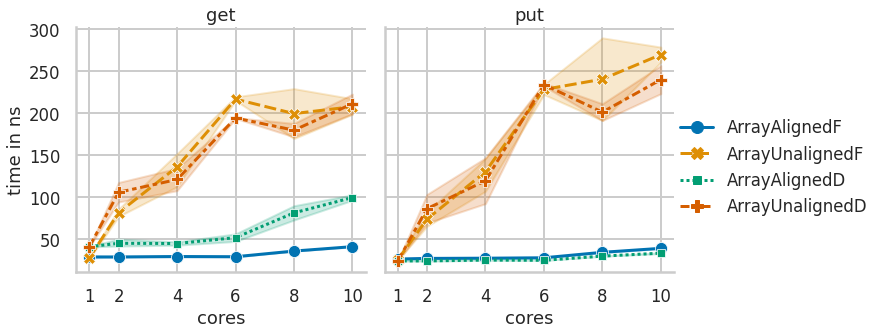

In [4]:
pgd = pandas.read_csv("out/align.csv")

pgd["cores"] = pgd["x"]
pgd["get"] = pgd["get_avg"]
pgd["put"] = pgd["put_avg"]
pgd = pgd[["cores", "get", "put", "alloc"]].melt(
    id_vars=["cores", "alloc"],
    value_vars=["get", "put"], value_name="time")
# pgd = pgd.groupby(["cores", "variable", "alloc"]).min()
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                col="variable", style="alloc", hue="alloc", markers=True)
g.set(xticks=[1, 2, 4, 6, 8, 10])
g.set(ylabel="time in ns")
g.set(xlabel="cores")
g.set_titles("{col_name}")
g.legend.set_title("")


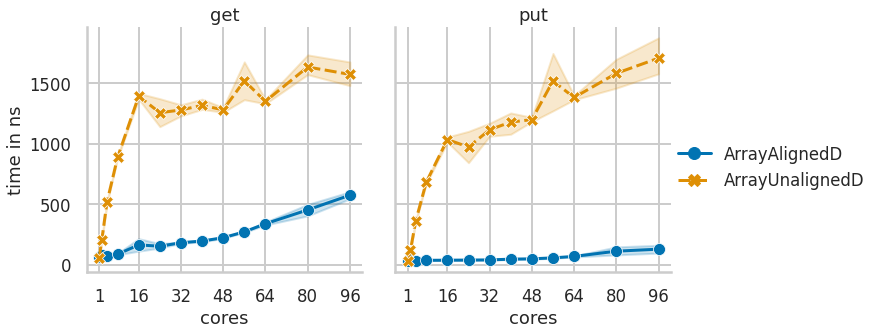

In [3]:
pgd = pandas.read_csv("remote/align_v.csv")

pgd["cores"] = pgd["x"]
pgd["get"] = pgd["get_avg"]
pgd["put"] = pgd["put_avg"]
pgd = pgd[["cores", "get", "put", "alloc"]].melt(
    id_vars=["cores", "alloc"],
    value_vars=["get", "put"], value_name="time")
# pgd = pgd.groupby(["cores", "variable", "alloc"]).min()
g = sns.relplot(data=pgd, kind="line", x="cores", y="time",
                col="variable", style="alloc", hue="alloc", markers=True)
g.set(xticks=[1, 16, 32, 48, 64, 80, 96])
g.set(ylabel="time in ns")
g.set(xlabel="cores")
g.set_titles("{col_name}")
g.legend.set_title("")
g.savefig("../../text/thesis/plot/false-sharing.pdf")
